Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [29]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [12]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Data/Train")
data_dir_test = pathlib.Path("Data/Test")

In [13]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [14]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [15]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


2023-12-10 13:36:31.631360: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [16]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [17]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

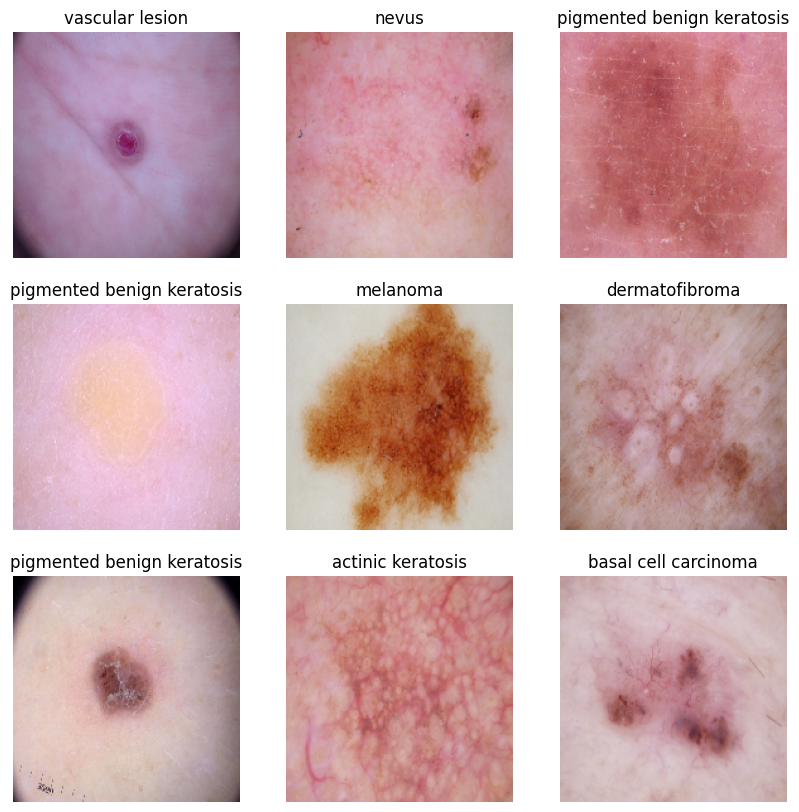

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [20]:
### Your code goes here
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [21]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 518400)            0         
                                                        

### Train the model

In [23]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 62s 872ms/step - loss: 2.7278 - accuracy: 0.2712 - val_loss: 1.9020 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 46s 817ms/step - loss: 1.7293 - accuracy: 0.3884 - val_loss: 1.6455 - val_accuracy: 0.4430
Epoch 3/20
56/56 [==============================] - 46s 821ms/step - loss: 1.3953 - accuracy: 0.5162 - val_loss: 1.5121 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - 46s 814ms/step - loss: 1.2654 - accuracy: 0.5586 - val_loss: 1.4687 - val_accuracy: 0.4877
Epoch 5/20
56/56 [==============================] - 46s 814ms/step - loss: 1.0565 - accuracy: 0.6233 - val_loss: 1.7321 - val_accuracy: 0.5145
Epoch 6/20
56/56 [==============================] - 46s 814ms/step - loss: 0.8909 - accuracy: 0.6964 - val

2023-12-10 13:37:17.801975: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 39 of 1000
2023-12-10 13:37:19.746387: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] Shuffle buffer filled.


### Visualizing training results

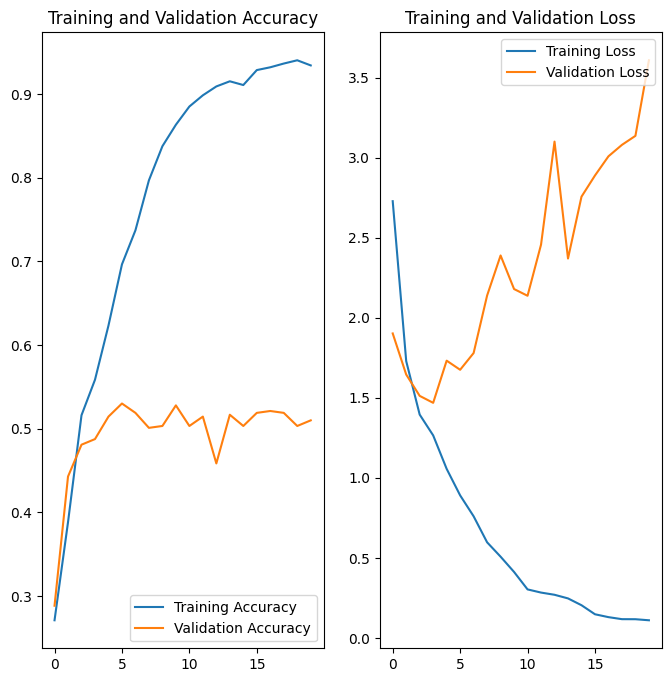

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We see that up to a certain number of epochs both the training and validation accuracy do increase but after a certain threshold is reached the validation accuracy starts to drop while the training accuracy keeps on increasing. This is clear case example of overfitting.

We also see something similar with respect to the loss function graph, the training loss keeps on reducing till 20 epochs are reached, whereas the validation loss starts to increase after a point indicating that as the model is learning, it is performing worse on the validation dataset.

We will use both data augmentation and drop out layers in further code to address he overfitting in the model.

In [25]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

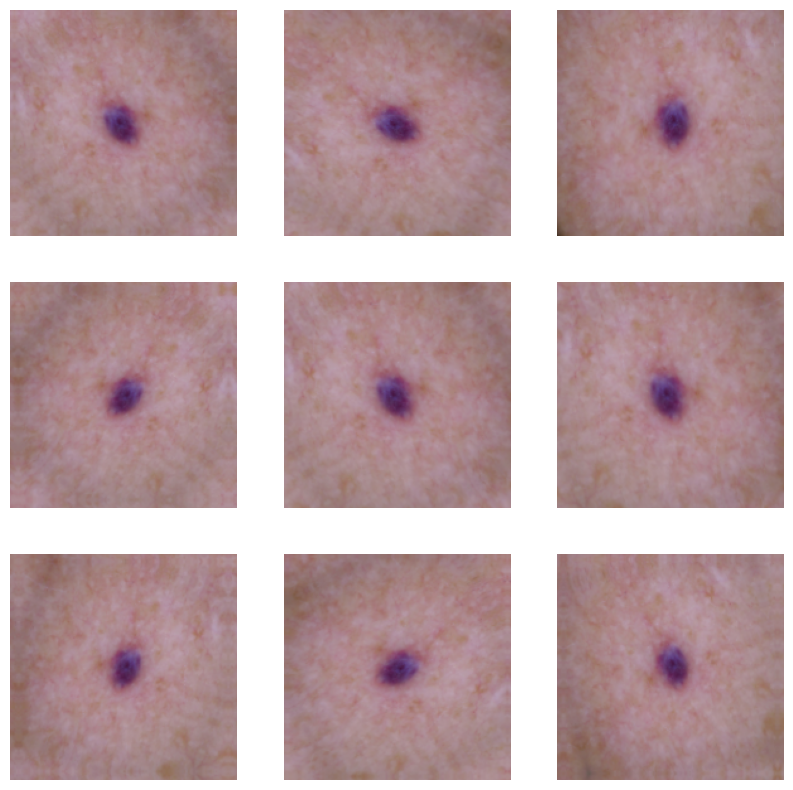

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [30]:
# augmenting data
# adding a drop out layer also since the previous model overfit

num_classes = 9

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 180, 180, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 90, 90, 64)       

### Training the model

In [32]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 53s 931ms/step - loss: 6.0160 - accuracy: 0.2165 - val_loss: 1.9993 - val_accuracy: 0.2215
Epoch 2/20
56/56 [==============================] - 52s 929ms/step - loss: 2.0147 - accuracy: 0.2294 - val_loss: 1.9610 - val_accuracy: 0.3154
Epoch 3/20
56/56 [==============================] - 52s 928ms/step - loss: 1.8958 - accuracy: 0.3259 - val_loss: 1.8009 - val_accuracy: 0.3982
Epoch 4/20
56/56 [==============================] - 52s 932ms/step - loss: 1.7420 - accuracy: 0.3717 - val_loss: 1.5848 - val_accuracy: 0.4541
Epoch 5/20
56/56 [==============================] - 52s 931ms/step - loss: 1.5613 - accuracy: 0.4581 - val_loss: 1.5981 - val_accuracy: 0.4474
Epoch 6/20
56/56 [==============================] - 52s 922ms/step - loss: 1.5791 - accuracy: 0.4548 - val_l

### Visualizing the results

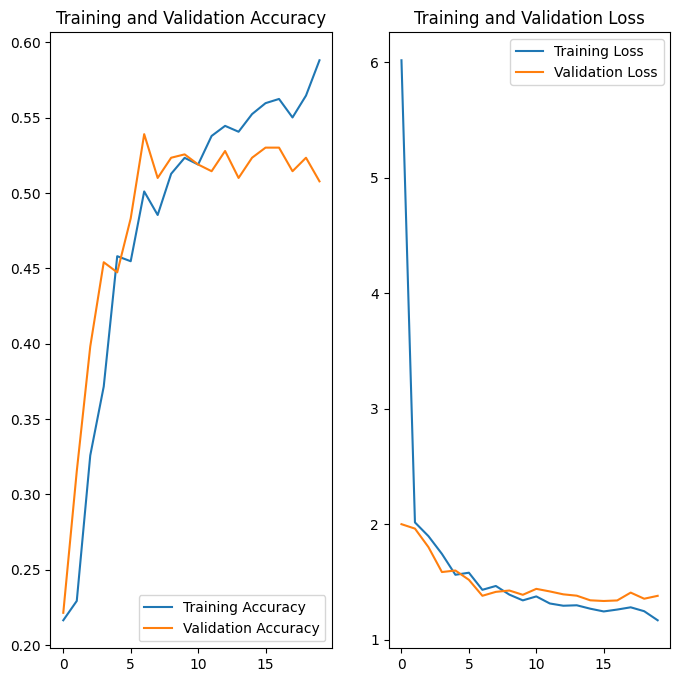

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We observe that both the training error and test error for this model is very high. Indicating that the model actually underfit. One of the potential reasons why this can happen is that, on a dataset with already existing class imbalance augmentation would have multiplied the images of the majority class which worsened the impact of class imbalance. We observe the accuracy graphs flatten for both the training and validation sets for around 50%. 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [34]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [35]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Data/Train/actinic keratosis/ISIC_0025780.jpg,actinic keratosis
1,Data/Train/actinic keratosis/ISIC_0025803.jpg,actinic keratosis
2,Data/Train/actinic keratosis/ISIC_0025825.jpg,actinic keratosis
3,Data/Train/actinic keratosis/ISIC_0025953.jpg,actinic keratosis
4,Data/Train/actinic keratosis/ISIC_0025957.jpg,actinic keratosis
...,...,...
2234,Data/Train/vascular lesion/ISIC_0033844.jpg,vascular lesion
2235,Data/Train/vascular lesion/ISIC_0033969.jpg,vascular lesion
2236,Data/Train/vascular lesion/ISIC_0033991.jpg,vascular lesion
2237,Data/Train/vascular lesion/ISIC_0034196.jpg,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


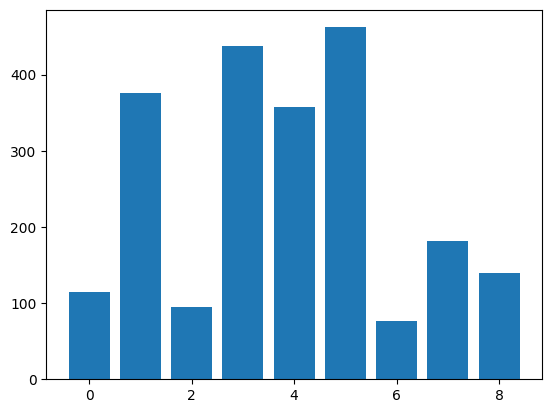

In [36]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()


#### Class that the least number of samples
The class 6 of `seborrheic keratosis` has the least number of samples at 77.
#### - Which classes dominate the data in terms proportionate number of samples?
Classes `pigmented benign keratosis` and `melanoma` have the maximum number of samples.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [39]:
%pip install Augmentor

  Using cached Augmentor-0.2.12-py2.py3-none-any.whl (38 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 12.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [40]:
path_to_training_dataset="Data/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Data/Train/actinic keratosis/output.Initialised with 376 image(s) found.
Output directory set to Data/Train/basal cell carcinoma/output.Initialised with 95 image(s) found.
Output directory set to Data/Train/dermatofibroma/output.Initialised with 438 image(s) found.
Output directory set to Data/Train/melanoma/output.Initialised with 357 image(s) found.
Output directory set to Data/Train/nevus/output.Initialised with 462 image(s) found.
Output directory set to Data/Train/pigmented benign keratosis/output.Initialised with 77 image(s) found.
Output directory set to Data/Train/seborrheic keratosis/output.Initialised with 181 image(s) found.
Output directory set to Data/Train/squamous cell carcinoma/output.Initialised with 139 image(s) found.
Output directory set to Data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDF1CEF27C0>: 100%|██████████| 500/500 [00:05<00:00, 96.24 Samples/s]                   
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDF1CEA4A00>: 100%|██████████| 500/500 [00:06<00:00, 82.25 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDF1CF01340>: 100%|██████████| 500/500 [00:05<00:00, 98.58 Samples/s]                   
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDF1CE4BEB0>: 100%|██████████| 500/500 [00:07<00:00, 68.24 Samples/s]                    
Processing <PIL.Image.Image image mode=RGB size=962x674 at 0x7FDF1FF53C40>: 100%|██████████| 500/500 [00:07<00:00, 65.80 Samples/s]                    
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDF1CE796A0>: 100%|██████████| 500/500 [00:06<00:00, 75.10 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDF1CEC21F0>: 100%|██████████|

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [41]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [42]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_29248b02-600a-45ee-bfc3-3db261bb3202.jpg',
 'Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_88e3e569-7b98-49eb-a2e1-7366a33fe755.jpg',
 'Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_bdbbad64-5541-4dee-a546-8edc1997de82.jpg',
 'Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_bf93092e-9aa7-49a4-b907-ac5f8d28afbb.jpg',
 'Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_daa4cbbc-a0ed-44a8-bbbc-cb86e22a3906.jpg',
 'Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025803.jpg_5f2851d6-e9a4-4cd6-b760-dea8e2b04d67.jpg',
 'Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025825.jpg_48647d63-5b7b-483d-92b3-94ac0d1ebebc.jpg',
 'Data/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025825.jpg_d37e6770-54aa-4efc-b32e-b6d0b35becc7.jpg',


In [43]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [44]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [53]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], axis=0)

In [54]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [55]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [56]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [57]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [64]:
# Adding additional dropout layers to reduce the overfitting in the previous model
# Adding max pooling 2d layers to reduce spatial dimentions since this will take a long time to train
# Adding batch normalization layers

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  BatchNormalization(),
  Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  BatchNormalization(),
  Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  BatchNormalization(),
  Dropout(0.2),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  BatchNormalization(),
  layers.Dense(num_classes)
])



#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [65]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [66]:
epochs = 20
## Your code goes here, use 20 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 41s 235ms/step - loss: 1.5036 - accuracy: 0.4785 - val_loss: 25.5896 - val_accuracy: 0.1084
Epoch 2/20
169/169 [==============================] - 40s 234ms/step - loss: 0.9627 - accuracy: 0.6652 - val_loss: 9.9818 - val_accuracy: 0.2146
Epoch 3/20
169/169 [==============================] - 39s 234ms/step - loss: 0.5978 - accuracy: 0.8003 - val_loss: 55.1345 - val_accuracy: 0.2205
Epoch 4/20
169/169 [==============================] - 40s 234ms/step - loss: 0.3360 - accuracy: 0.8874 - val_loss: 3.3424 - val_accuracy: 0.5264
Epoch 5/20
169/169 [==============================] - 39s 233ms/step - loss: 0.2140 - accuracy: 0.9293 - val_loss: 1.5885 - val_accuracy: 0.6563
Epoch 6/20
169/169 [==============================] - 40s 234ms/step - loss: 0.1809 - ac

#### **Todo:**  Visualize the model results

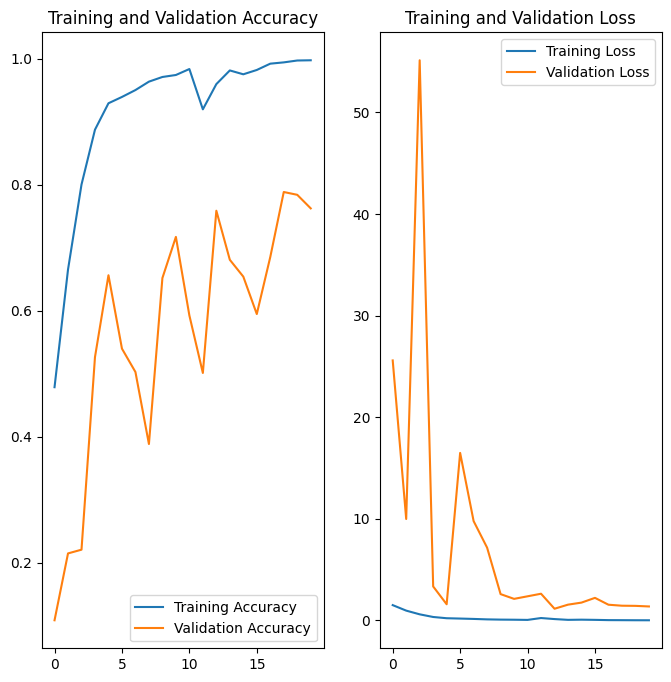

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



We observe that the training accuracy is around 99% and test accuracy of around 77%. We still see here that there is some overfitting since the gap between training error and test error is high, we can perhaps consider increasing the ratio of neurons picked up for drop out etc. But we see this model is better than the previous one, since it is able to provide reasonable validation accuracy. In this sense, we can say that class imbalance did help us better generalize the model, but there is still some overfitting. The solutions to this can be advanced hyperparameter tuning and finding out the optimum number of layers (reducing them), number of neurons in each layers(reducing), activations functions etc.  